In [1]:
import os
import numpy as np
import rasterio as rio
import geopandas as gpd
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, BoundaryNorm

# OpenET mean vs stdv

In [2]:
WestUS_shapefile = '../../Data_main/shapefiles/Western_US_ref_shapes/WestUS_states.shp'
openET_stdv = '../../Data_main/Raster_data/OpenET_stdv_mean/OpenET_stdv_2016.tif'
openET_mean = '../../Data_main/Raster_data/OpenET_stdv_mean/OpenET_mean_2016.tif'

In [3]:
westUS = gpd.read_file(WestUS_shapefile)
openET_stdv_data = rio.open(openET_stdv)
openET_mean_data = rio.open(openET_mean)

# applying nan mask
openET_stdv_masked = np.ma.masked_invalid(openET_stdv_data.read(1))
openET_stdv_masked[openET_stdv_masked == -9999] = np.nan

openET_mean_masked = np.ma.masked_invalid(openET_mean_data.read(1))
openET_mean_masked[openET_mean_masked == -9999] = np.nan


In [4]:
# Calculate the quartiles for standard deviation and mean data
stdv_quartiles = np.nanpercentile(openET_stdv_masked.compressed(), [25, 50, 75])
mean_quartiles = np.nanpercentile(openET_mean_masked.compressed(), [25, 50, 75])

# Define boundaries for the quartiles, include min and max for completeness
stdv_boundaries = [np.nanmin(openET_stdv_masked), *stdv_quartiles, np.nanmax(openET_stdv_masked)]
mean_boundaries = [np.nanmin(openET_mean_masked), *mean_quartiles, np.nanmax(openET_mean_masked)]

# Create BoundaryNorm objects for standard deviation and mean
stdv_norm = BoundaryNorm(stdv_boundaries, ncolors=256, clip=True)
mean_norm = BoundaryNorm(mean_boundaries, ncolors=256, clip=True)

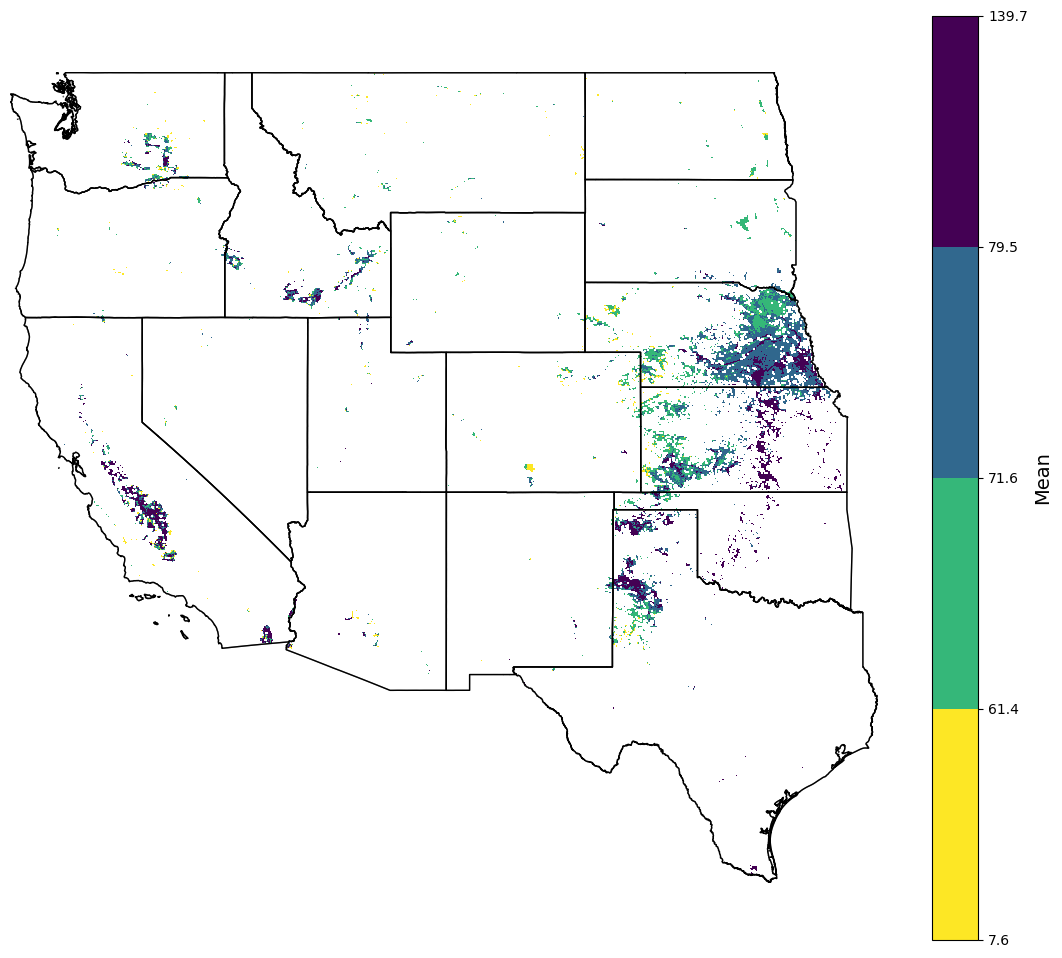

In [8]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 12))

# Plotting the mean with quartile color ramp
mean_image = ax.imshow(openET_mean_masked, cmap='viridis_r', norm=mean_norm, extent=rio.plot.plotting_extent(openET_mean_data))
westUS.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)
mean_cbar = fig.colorbar(plt.cm.ScalarMappable(norm=mean_norm, cmap='viridis_r'), ax=ax, orientation='vertical')
mean_cbar.set_label('Mean', fontsize=14)
westUS.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, alpha=0.4)
ax.set_axis_off()

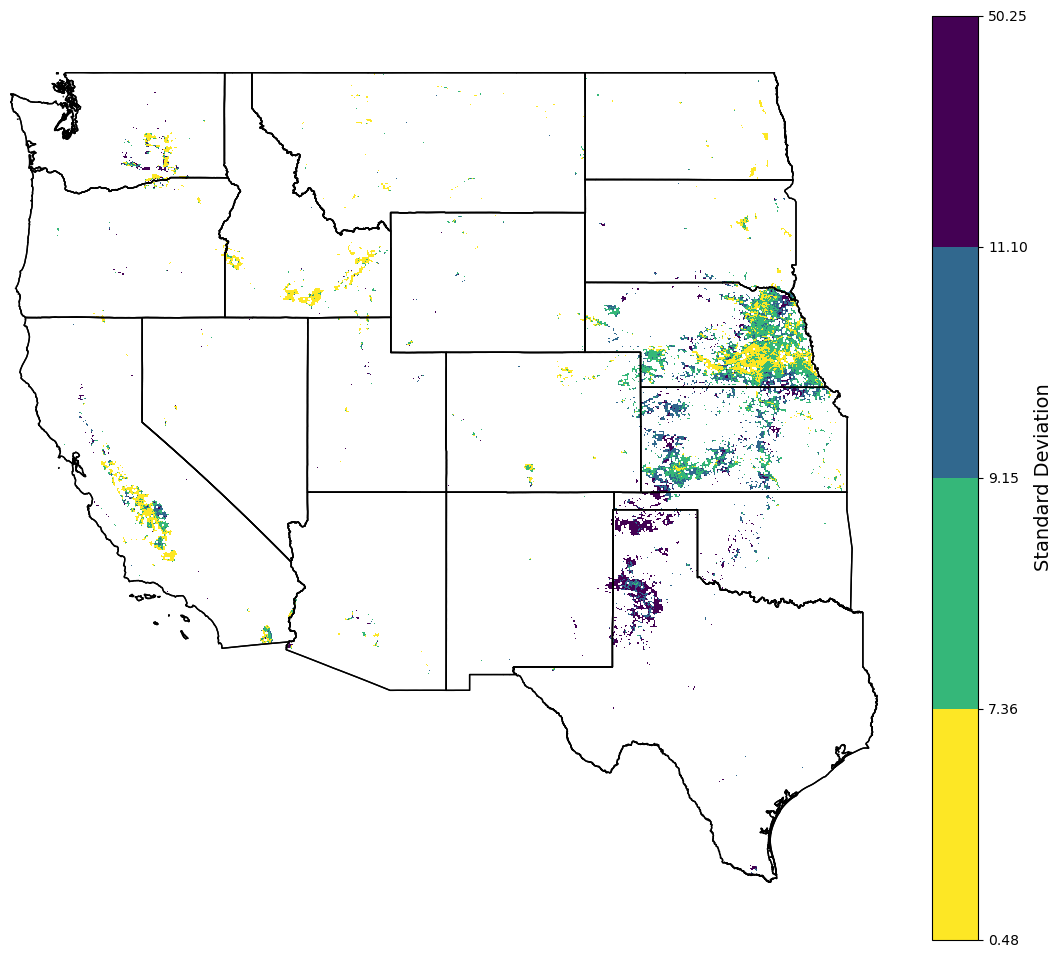

In [9]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 12))

# Plotting the standard deviation with quartile color ramp
stdv_image = ax.imshow(openET_stdv_masked, cmap='viridis_r', norm=stdv_norm, extent=rio.plot.plotting_extent(openET_stdv_data))
westUS.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)
stdv_cbar = fig.colorbar(plt.cm.ScalarMappable(norm=stdv_norm, cmap='viridis_r'), ax=ax, orientation='vertical')
stdv_cbar.set_label('Standard Deviation', fontsize=14)
westUS.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)
ax.set_axis_off()